<a href="https://colab.research.google.com/github/dineshRaja29/MLPinTensorFlowusingKeras/blob/main/MNIST_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP MODELS ON MNIST 

In [ ]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [ ]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty):
  print("inside of plt")
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()
  print("leaving the plt")

In [ ]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))
print("sample one point is :: \n", X_train[0])

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)
sample one point is :: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   

In [ ]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 


In [ ]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [ ]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [ ]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model I

In [ ]:


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [ ]:
# some model parameters

output_dim = 10  ## class labels in one hot encoding since we use softmax classifier 
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [ ]:
# start building a model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(output_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_29 (Batc (None, 64)                256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                650       
Total para

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/step - loss: 1.3384 - acc: 0.5710 - val_loss: 0.4700 - val_acc: 0.8806
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.8326 - acc: 0.7328 - val_loss: 0.3819 - val_acc: 0.9019
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.7109 - acc: 0.7777 - val_loss: 0.3335 - val_acc: 0.9111
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.6468 - acc: 0.8006 - val_loss: 0.3034 - val_acc: 0.9163
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.6001 - acc: 0.8165 - val_loss: 0.2800 - val_acc: 0.9234
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.5661 - acc: 0.8264 - val_loss: 0.2621 - val_acc: 0.9270
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.5369 - acc: 0.8367 - val_loss: 0.2496 - val_acc

Test score: 0.1725615408781916
Test accuracy: 0.9488
inside of plt


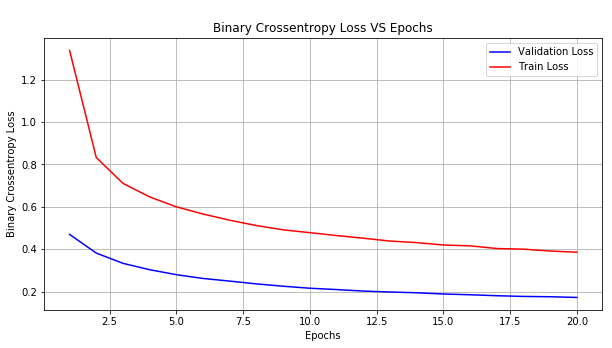

leaving the plt


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0) 
x = list(range(1,nb_epoch+1))

print('Test score:', score[0]) 
print('Test accuracy:', score[1])
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)

## Model II

In [ ]:
# start building a model
model_ii = Sequential()
model_ii.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_ii.add(BatchNormalization())
model_ii.add(Dropout(0.6))
model_ii.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_ii.add(BatchNormalization())
model_ii.add(Dropout(0.6))
model_ii.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_ii.add(BatchNormalization())
model_ii.add(Dropout(0.6))
model_ii.add(Dense(output_dim, activation='softmax'))
model_ii.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_30 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_31 (Batc (None, 64)                256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
__________

In [ ]:
model_ii.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_ii.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.1254 - acc: 0.3037 - val_loss: 1.0796 - val_acc: 0.7781
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.5937 - acc: 0.4411 - val_loss: 0.9140 - val_acc: 0.8221
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 1.4277 - acc: 0.5027 - val_loss: 0.7949 - val_acc: 0.8482
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.3344 - acc: 0.5391 - val_loss: 0.7024 - val_acc: 0.8649
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.2575 - acc: 0.5681 - val_loss: 0.6348 - val_acc: 0.8767
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.2097 - acc: 0.5827 - val_loss: 0.5825 - val_acc: 0.8831
Epoch 7/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.1603 - acc: 0.6004 - val_loss: 0.5353 - val_ac

Test score: 0.3036018749833107
Test accuracy: 0.9237
inside of plt


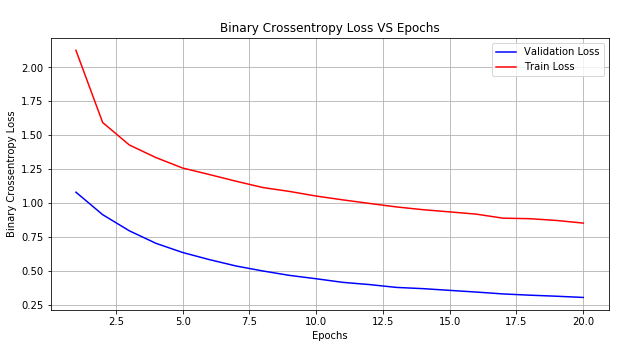

leaving the plt


In [ ]:
score = model_ii.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)

## Model III

In [ ]:
model_iii = Sequential()
model_iii.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.6))
model_iii.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.6))
model_iii.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.6))
model_iii.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.6))
model_iii.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.6))
model_iii.add(Dense(output_dim, activation='softmax'))
model_iii.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
__________

In [ ]:
model_iii.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_iii.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 2.7938 - acc: 0.1265 - val_loss: 2.1717 - val_acc: 0.1842
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.3062 - acc: 0.1661 - val_loss: 2.1511 - val_acc: 0.1267
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 2.1904 - acc: 0.1977 - val_loss: 2.1221 - val_acc: 0.1258
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.1283 - acc: 0.2183 - val_loss: 2.0953 - val_acc: 0.1363
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.0897 - acc: 0.2333 - val_loss: 2.0587 - val_acc: 0.1497
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.0488 - acc: 0.2466 - val_loss: 2.0115 - val_acc: 0.1682
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 2.0138 - acc: 0.2579 - val_loss: 1.9623 - val_ac

Test score: 1.393195158958435
Test accuracy: 0.4544
inside of plt


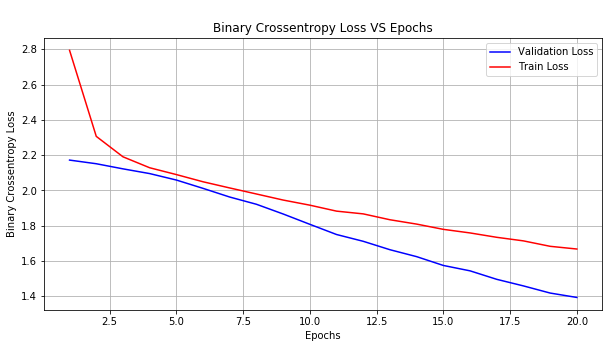

leaving the plt


In [ ]:
score = model_iii.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.add_column("S.NO",[1,2,3])
x.add_column("#f Hidden Layers",[2,3,5])
x.add_column("Model Description",["256-BN-DR-64-BN_DR","256-BN-DR-64-BN_DR-32-BN_DR","512-BN-DR-256-BN-DR-128-BN-DR-64-BN-DR-32-BN-DR"])
x.add_column("Train Accuracy",["88.54","71.76","37.29"])
x.add_column("Validation Accuracy",["94.89" ,"92.37","45.44" ])
print(x)
print("----------------------------------------")
print("---------- Conventions -----------------")
print("----------------------------------------")
print("\"BN\" means Batch Normalization layer")
print("\"DR\" means Dropout rate layer")
print("----------------------------------------")
print("----------------------------------------")

+------+------------------+-------------------------------------------------+----------------+---------------------+
| S.NO | #f Hidden Layers |                Model Description                | Train Accuracy | Validation Accuracy |
+------+------------------+-------------------------------------------------+----------------+---------------------+
|  1   |        2         |                256-BN-DR-64-BN_DR               |     88.54      |        94.89        |
|  2   |        3         |           256-BN-DR-64-BN_DR-32-BN_DR           |     71.76      |        92.37        |
|  3   |        5         | 512-BN-DR-256-BN-DR-128-BN-DR-64-BN-DR-32-BN-DR |     37.29      |        45.44        |
+------+------------------+-------------------------------------------------+----------------+---------------------+
----------------------------------------
---------- Conventions -----------------
----------------------------------------
"BN" means Batch Normalization layer
"DR" means Dropout ra

** Note ** : Model III is deep network and tends to overfit easily because <br>
                     1: Less data points compare to the depth of network <br>
                     2: Number in each hidden layer is very high, require hyperparameter tuning.